In [1]:
#Importing all necessary library for Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

In [2]:
#Loading csv dataset and using converters to remove leading & trailing whitespace in the Ethnicity column
df = pd.read_csv('Fixed_data.csv', converters={'Ethnicity': str.strip})

In [3]:
#Code shows the first 10 datapoints in the dataset
df.head()

,Code,Area,Year,Sex,Ethnicity,Pupils,Attainment8,Progress8
0,E09000002,Barking and Dagenham,2018/19,All,White,903.0,41.7,-0.21
1,E09000002,Barking and Dagenham,2018/19,All,Mixed,227.0,44.7,0.05
2,E09000002,Barking and Dagenham,2018/19,All,Asian,530.0,53.3,0.60
3,E09000002,Barking and Dagenham,2018/19,All,Black,642.0,48.0,0.37
4,E09000002,Barking and Dagenham,2018/19,All,Chinese,3.0,69.0,0.93


In [4]:
#Describes the dataset 
df.describe()

,Pupils,Attainment8,Progress8
count,3110.000000,3106.000000,3048.000000
mean,6146.238585,52.011719,0.285722
std,30810.214114,7.770027,0.430250
min,1.000000,15.000000,-0.860000
25%,124.250000,46.900000,-0.020000
50%,406.000000,50.500000,0.240000
75%,1463.000000,55.300000,0.530000
max,540006.000000,89.000000,2.820000


In [5]:
#Summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Code         3240 non-null   object 
 1   Area         3240 non-null   object 
 2   Year         3240 non-null   object 
 3   Sex          3240 non-null   object 
 4   Ethnicity    3240 non-null   object 
 5   Pupils       3110 non-null   float64
 6   Attainment8  3106 non-null   float64
 7   Progress8    3048 non-null   float64
dtypes: float64(3), object(5)
memory usage: 202.6+ KB


In [6]:
#Calculcation for total number of students in dataset between academic years 2015-2019
all_students_ethnicity_sex = df[(df['Sex'] == 'All') & 
                                (df['Ethnicity'] == 'All Pupils')]
total_students = all_students_ethnicity_sex['Pupils'].sum()
print("There exists a total number of %d students in this GCSE dataset between academic years 2015-2019" %total_students)

There exists a total number of 4863974 students in this GCSE dataset between academic years 2015-2019


In [7]:
#Calculcation for total number of female students in dataset between academic years 2015-2019
girls_student_all_ethnics = df[((df['Sex'] == 'Girls') & 
                                (df['Ethnicity'] == 'All Pupils'))]
total_girls = girls_student_all_ethnics['Pupils'].sum()
print("There exists a total number of %d of girls in the GCSE dataset between academic years 2015-2019."%total_girls)

There exists a total number of 2391378 of girls in the GCSE dataset between academic years 2015-2019.


In [8]:
#Calculcation for total number of male students in dataset between academic years 2015-2019
boys_student_all_ethnics = df[((df['Sex'] == 'Boys') & 
                               (df['Ethnicity'] == 'All Pupils'))]
total_boys = boys_student_all_ethnics['Pupils'].sum()
print("There exists a total number of %d of boys in the GCSE dataset between academic years 2015-2019."%total_boys)

There exists a total number of 2472596 of boys in the GCSE dataset between academic years 2015-2019.


In [9]:
#Total number of null/NaN values in the dataset
df.isnull().sum()

Code             0
Area             0
Year             0
Sex              0
Ethnicity        0
Pupils         130
Attainment8    134
Progress8      192
dtype: int64

In [10]:
#Calculation of quantiles, IQR and removal of outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)).any(axis=1)
df_outlier = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outlier_removed = df_outlier.dropna()
df_cleaned = df_outlier_removed.set_index('Area').reset_index()
print(IQR)
df_cleaned

Pupils         1338.75
Attainment8       8.40
Progress8         0.55
dtype: float64


,Area,Code,Year,Sex,Ethnicity,Pupils,Attainment8,Progress8
0,Barking and Dagenham,E09000002,2018/19,All,White,903.0,41.7,-0.21
1,Barking and Dagenham,E09000002,2018/19,All,Mixed,227.0,44.7,0.05
2,Barking and Dagenham,E09000002,2018/19,All,Asian,530.0,53.3,0.60
3,Barking and Dagenham,E09000002,2018/19,All,Black,642.0,48.0,0.37
4,Barking and Dagenham,E09000002,2018/19,All,All Pupils,2353.0,46.4,0.16
...,...,...,...,...,...,...,...,...
2418,Yorkshire and the Humber,E12000003,2015/16,Boys,Mixed,849.0,45.7,-0.29
2419,Yorkshire and the Humber,E12000003,2015/16,Girls,Asian,2938.0,50.5,0.28
2420,Yorkshire and the Humber,E12000003,2015/16,Girls,Black,530.0,50.4,0.42
2421,Yorkshire and the Humber,E12000003,2015/16,Girls,Chinese,64.0,64.0,0.96


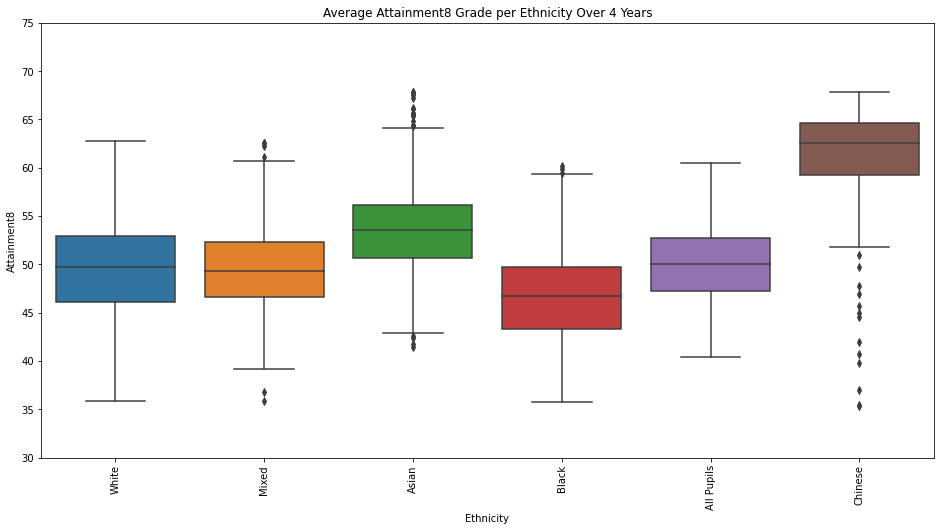

In [11]:
#Ethnicity with highest and lowest results across 4 years and 
var = 'Ethnicity'
data = pd.concat([df_cleaned['Attainment8'], df_cleaned[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Attainment8", data=data)
fig.axis(ymin=30, ymax=75);
plt.title('Average Attainment8 Grade per Ethnicity Over 4 Years')
plt.xticks(rotation=90);

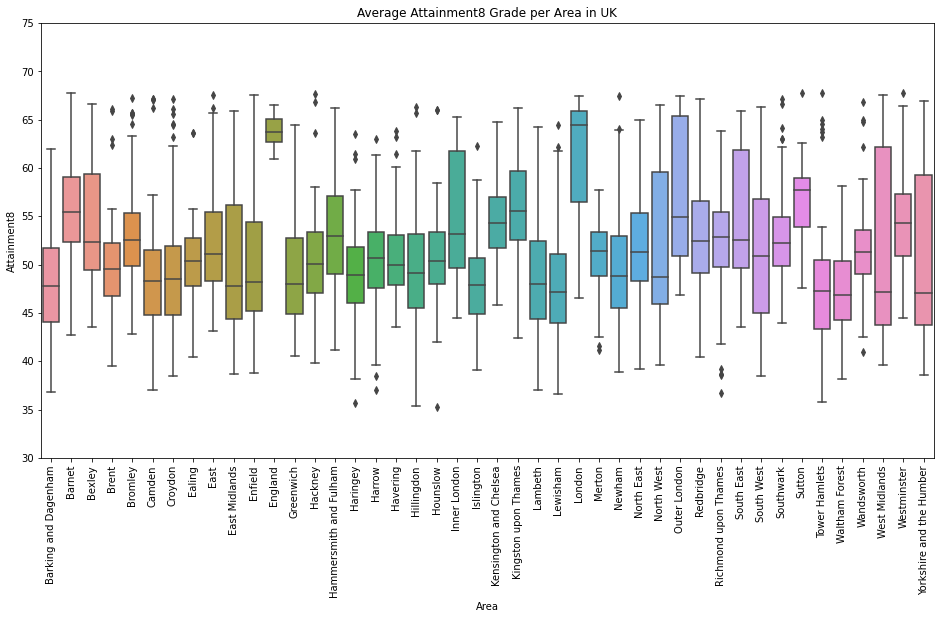

In [12]:
#Boxplot of Average Attainment8 Grade per Area in UK 
var = 'Area'
data = pd.concat([df_cleaned['Attainment8'], df_cleaned[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Attainment8", data=data)
fig.axis(ymin=30, ymax=75);
plt.title('Average Attainment8 Grade per Area in UK')
plt.xticks(rotation=90);

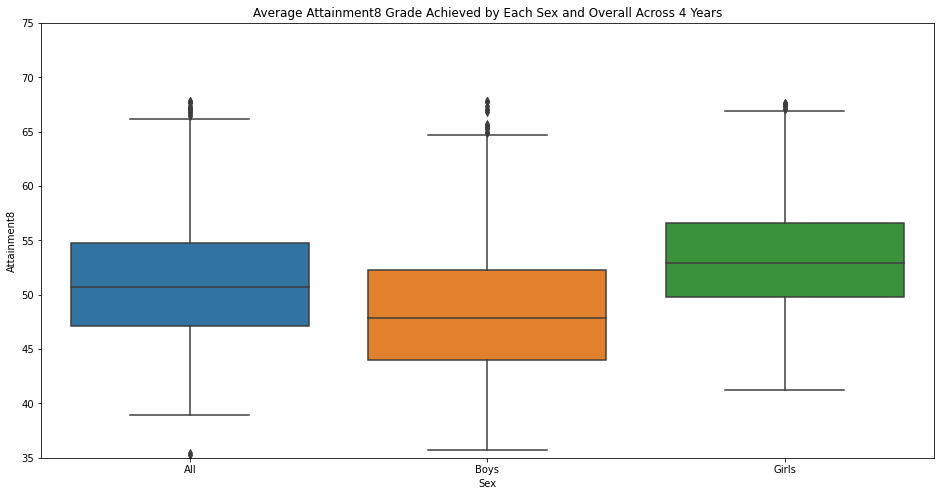

In [13]:
#Boxplot of Average Attainment8 Grade Achieved by Each Sex and Overall Across 4 Academic Years
var = 'Sex'
data = pd.concat([df_cleaned['Attainment8'], df_cleaned[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Attainment8", data=data)
fig.axis(ymin=35, ymax=75);
plt.title('Average Attainment8 Grade Achieved by Each Sex and Overall Across 4 Years')
plt.xticks(rotation=0);

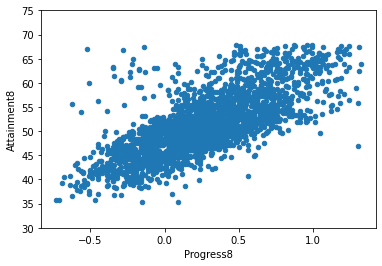

In [14]:
#Scatter Plot Graph of Progress8 Scores against Attainment8 Scores
var = 'Progress8'
data = pd.concat([df_cleaned['Attainment8'], df_cleaned[var]], axis=1)
data.plot.scatter(x=var, y='Attainment8', ylim=(30,75));

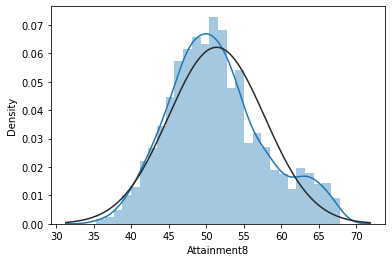

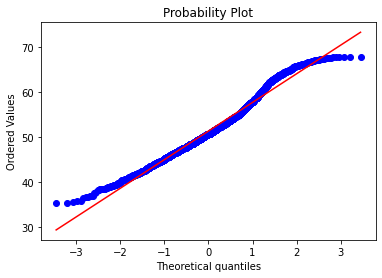

In [15]:
# Inital Histogram and normal probability plot after IQR filtering
sns.distplot(df_cleaned['Attainment8'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_cleaned['Attainment8'], plot=plt)

In [16]:
# Applying log transformation to more perfectly match the Gaussian distribution
df_cleaned['log Attainment8'] = np.log(df_cleaned['Attainment8'])
df_cleaned['log Progress8'] = np.log(df_cleaned['Progress8'])

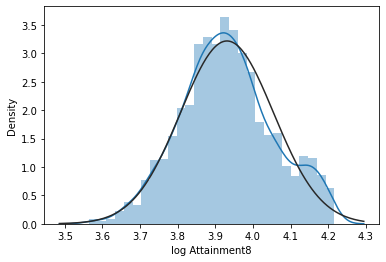

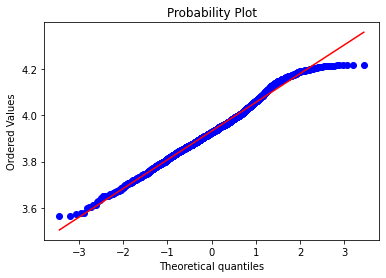

In [17]:
# Histogram and normal probability plot after log transformation ready for ML analysis
sns.distplot(df_cleaned['log Attainment8'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_cleaned['log Attainment8'], plot=plt)

In [18]:
#Skewness and Kurtosis Value of Attainment8
print("Skewness: %f" % df_cleaned['Attainment8'].skew())
print("Kurtosis: %f" % df_cleaned['Attainment8'].kurt())

Skewness: 0.422188
Kurtosis: -0.171318


In [19]:
#Dropping unneeded columns such as Code and Pupils from the dataset
df_nocode_pup = df_cleaned.drop(columns={'Code', 'Pupils'})

In [20]:
#Setting Area as the new Index for the Dataset
df_area_ix = df_nocode_pup.set_index('Area')

In [21]:
#Selecting 'ALl' Sexes from dataset into a variable and then dropping 'Sex' Column and placing that modification 
#into a new Variable
df_all_sexes = df_area_ix[(df_area_ix['Sex']=='All')]
df_all_sex = df_all_sexes.drop(columns={'Sex'})
df_all_sex

,Year,Ethnicity,Attainment8,Progress8,log Attainment8,log Progress8
Area,,,,,,
Barking and Dagenham,2018/19,White,41.7,-0.21,3.730501,NaN
Barking and Dagenham,2018/19,Mixed,44.7,0.05,3.799974,-2.995732
Barking and Dagenham,2018/19,Asian,53.3,0.60,3.975936,-0.510826
Barking and Dagenham,2018/19,Black,48.0,0.37,3.871201,-0.994252
Barking and Dagenham,2018/19,All Pupils,46.4,0.16,3.837299,-1.832581
...,...,...,...,...,...,...
Yorkshire and the Humber,2016/17,Chinese,60.8,1.16,4.107590,0.148420
Yorkshire and the Humber,2016/17,Mixed,43.8,-0.08,3.779634,NaN
Yorkshire and the Humber,2015/16,Black,46.7,0.28,3.843744,-1.272966


In [22]:
#Selecting 'White' Ethnicity, dropping 'Ethnicity' column and then Standardising White Attainment8 and Progress8 Scores
#Then dropped 'Year' Column and used groupby for 'Area' column and then took the average for White Attainment8 and Progress8 
#Standardised values
df_white_grades = df_all_sex[(df_all_sex['Ethnicity']=='White')]
df_w_eth_dropped = df_white_grades.drop(columns={'Ethnicity'})
dfw=df_w_eth_dropped.reset_index()
dfw1 = dfw.sort_values(['Area', 'Year']).set_index(['Area'])
dfw2 = dfw1.rename(columns={'Attainment8':'W Att8', 'Progress8':'W Prog8' })
df_w_mean = dfw2.drop(columns={'Year'}).groupby('Area').agg({'W Att8':'mean', 'W Prog8':'mean'})

In [23]:
#Selecting 'Black' Ethnicity, dropping 'Ethnicity' column and then Standardising Black 'Attainment8' and 'Progress8' Scores
#Then dropped 'Year' Column and used groupby for 'Area' column and then took the average for 'Black Attainment8' and 'Progress8' 
#Standardised values
df_black_grades = df_all_sex[(df_all_sex['Ethnicity']=='Black')]
df_b_eth_dropped = df_black_grades.drop(columns={'Ethnicity'})
dfb=df_b_eth_dropped.reset_index()
dfb1 = dfb.sort_values(['Area', 'Year']).set_index(['Area'])
dfb2 = dfb1.rename(columns={'Attainment8':'B Att8', 'Progress8':'B Prog8' })
df_b_mean = dfb2.drop(columns={'Year'}).groupby('Area').agg({'B Att8':'mean', 'B Prog8':'mean'})

In [24]:
#Selecting 'Asian' Ethnicity, dropping 'Ethnicity' column and then Standardising Asian 'Attainment8' and 'Progress8' Scores
#Then dropped 'Year' Column and used groupby for 'Area' column and then took the average for 'Asian Attainment8' and 'Progress8' 
#Standardised values
df_asian_grades = df_all_sex[(df_all_sex['Ethnicity']=='Asian')]
df_a_eth_dropped = df_asian_grades.drop(columns={'Ethnicity'})
dfa=df_a_eth_dropped.reset_index()
dfa1 = dfa.sort_values(['Area', 'Year']).set_index(['Area'])
dfa2 = dfa1.rename(columns={'Attainment8':'A Att8', 'Progress8':'A Prog8' })
df_a_mean = dfa2.drop(columns={'Year'}).groupby('Area').agg({'A Att8':'mean', 'A Prog8':'mean'})

In [25]:
#Selecting 'Mixed' Ethnicity, dropping 'Ethnicity' column and then Standardising Mixed 'Attainment8' and 'Progress8' Scores
#Then dropped 'Year' Column and used groupby for 'Area' column and then took the average for 'Mixed Attainment8' and 'Progress8' 
#Standardised values
df_mixed_grades = df_all_sex[(df_all_sex['Ethnicity']=='Mixed')]
df_m_eth_dropped = df_mixed_grades.drop(columns={'Ethnicity'})
dfm=df_m_eth_dropped.reset_index()
dfm1 = dfm.sort_values(['Area', 'Year']).set_index(['Area'])
dfm2 = dfm1.rename(columns={'Attainment8':'M Att8', 'Progress8':'M Prog8' })
df_m_mean = dfm2.drop(columns={'Year'}).groupby('Area').agg({'M Att8':'mean', 'M Prog8':'mean'})

In [26]:
#Selecting 'Chinese' Ethnicity, dropping 'Ethnicity' column and then Standardising Chinese 'Attainment8' and 'Progress8' Scores
#Then dropped 'Year' Column and used groupby for 'Area' column and then took the average for 'Chinese Attainment8' and 'Progress8' 
#Standardised values
df_chinese_grades = df_all_sex[(df_all_sex['Ethnicity']=='Chinese')]
df_c_eth_dropped = df_chinese_grades.drop(columns={'Ethnicity'})
dfc = df_c_eth_dropped.reset_index()
dfc1 = dfc.sort_values(['Area', 'Year']).set_index(['Area'])
dfc2 = dfc1.rename(columns={'Attainment8':'C Att8', 'Progress8':'C Prog8' })
df_c_mean = dfc2.drop(columns={'Year'}).groupby('Area').agg({'C Att8':'mean', 'C Prog8':'mean'})

In [48]:
#Concatenate each filtered datasets above into a new dataset containing Standardised values of each Ethnicity Attainment8 &
#Progress8 Scores
full_df = pd.concat([df_w_mean, df_b_mean, df_a_mean, df_m_mean, df_c_mean], axis=1)
fdf = full_df.reset_index().set_index('index')
fdf.head()

,W Att8,W Prog8,B Att8,B Prog8,A Att8,A Prog8,M Att8,M Prog8,C Att8,C Prog8
index,,,,,,,,,,
Barking and Dagenham,43.550,-0.1225,48.375,0.3900,53.900000,0.597500,44.633333,-0.053333,54.800000,0.180000
Barnet,55.350,0.4175,48.775,0.2700,65.033333,0.813333,55.775000,0.380000,NaN,NaN
Bexley,47.225,-0.2775,55.400,0.3825,59.600000,0.532500,50.375000,-0.080000,63.333333,0.496667
Brent,47.875,0.3425,44.525,0.0450,52.825000,0.820000,48.533333,0.086667,64.800000,0.806667
Bromley,50.800,0.0425,50.725,0.3025,64.533333,0.703333,52.900000,0.202500,65.700000,0.470000


In [28]:
#Median scores were used as imputation for Null/NaN values
fdf['W Att8'] = fdf['W Att8'].fillna(fdf['W Att8'].median())
fdf['W Prog8'] = fdf['W Prog8'].fillna(fdf['W Prog8'].median())
fdf['B Att8'] = fdf['B Att8'].fillna(fdf['B Att8'].median())
fdf['B Prog8'] = fdf['B Prog8'].fillna(fdf['B Prog8'].median())
fdf['A Att8'] = fdf['A Att8'].fillna(fdf['A Att8'].median())
fdf['A Prog8'] = fdf['A Prog8'].fillna(fdf['A Prog8'].median())
fdf['M Att8'] = fdf['M Att8'].fillna(fdf['M Att8'].median())
fdf['M Prog8'] = fdf['M Prog8'].fillna(fdf['M Prog8'].median())
fdf['C Att8'] = fdf['C Att8'].fillna(fdf['C Att8'].median())
fdf['C Prog8'] = fdf['C Prog8'].fillna(fdf['C Prog8'].median())

In [49]:
#Dataset renamed index to 'Area' and assigned to a new variable name: fdf_cleaned and dataset displayed
fdf_cleaned = fdf.reset_index().rename(columns={'index':'Area'})
fdf_cleaned.head()

,Area,W Att8,W Prog8,B Att8,B Prog8,A Att8,A Prog8,M Att8,M Prog8,C Att8,C Prog8
0,Barking and Dagenham,43.550,-0.1225,48.375,0.3900,53.900000,0.597500,44.633333,-0.053333,54.800000,0.180000
1,Barnet,55.350,0.4175,48.775,0.2700,65.033333,0.813333,55.775000,0.380000,NaN,NaN
2,Bexley,47.225,-0.2775,55.400,0.3825,59.600000,0.532500,50.375000,-0.080000,63.333333,0.496667
3,Brent,47.875,0.3425,44.525,0.0450,52.825000,0.820000,48.533333,0.086667,64.800000,0.806667
4,Bromley,50.800,0.0425,50.725,0.3025,64.533333,0.703333,52.900000,0.202500,65.700000,0.470000


In [30]:
#filtered cleaned dataset for each ethnicity's Prog8 scores and assigned to new variable name newx
newx = fdf_cleaned.filter(['W Prog8', 'B Prog8', 'A Prog8', 'M Prog8', 'C Prog8'], axis=1)

In [31]:
#filtered cleaned dataset for each ethnicity's Attainment8 scores and assigned to new variable name newy
newy = fdf_cleaned.filter(['W Att8', 'B Att8', 'A Att8', 'M Att8', 'C Att8'], axis=1)

In [50]:
#Concatenated into a new dataframe and variable called new_full_df, dataframe shown below
new_full_df = pd.concat([newx, newy], axis=1)
new_full_df.head()

,W Prog8,B Prog8,A Prog8,M Prog8,C Prog8,W Att8,B Att8,A Att8,M Att8,C Att8
0,-0.1225,0.3900,0.597500,-0.053333,0.180000,43.550,48.375,53.900000,44.633333,54.800000
1,0.4175,0.2700,0.813333,0.380000,0.770833,55.350,48.775,65.033333,55.775000,62.375000
2,-0.2775,0.3825,0.532500,-0.080000,0.496667,47.225,55.400,59.600000,50.375000,63.333333
3,0.3425,0.0450,0.820000,0.086667,0.806667,47.875,44.525,52.825000,48.533333,64.800000
4,0.0425,0.3025,0.703333,0.202500,0.470000,50.800,50.725,64.533333,52.900000,65.700000


In [33]:
#Correlation values between features for feature selection purposes
new_full_df.corr()

,W Prog8,B Prog8,A Prog8,M Prog8,C Prog8,W Att8,B Att8,A Att8,M Att8,C Att8
W Prog8,1.000000,0.022343,0.434880,0.655474,0.196081,0.769188,-0.159289,0.195305,0.446604,0.242326
B Prog8,0.022343,1.000000,0.572556,0.482270,-0.182704,0.084449,0.776091,0.469868,0.412752,0.005666
A Prog8,0.434880,0.572556,1.000000,0.656946,-0.075391,0.258392,0.247948,0.599283,0.455371,0.006687
M Prog8,0.655474,0.482270,0.656946,1.000000,-0.216725,0.647603,0.347975,0.530175,0.860364,0.001138
C Prog8,0.196081,-0.182704,-0.075391,-0.216725,1.000000,0.066193,-0.289936,-0.272727,-0.167650,0.413182
W Att8,0.769188,0.084449,0.258392,0.647603,0.066193,1.000000,0.158865,0.326250,0.679788,0.289560
B Att8,-0.159289,0.776091,0.247948,0.347975,-0.289936,0.158865,1.000000,0.467847,0.533864,0.133003
A Att8,0.195305,0.469868,0.599283,0.530175,-0.272727,0.326250,0.467847,1.000000,0.574550,0.178188
M Att8,0.446604,0.412752,0.455371,0.860364,-0.167650,0.679788,0.533864,0.574550,1.000000,0.142024
C Att8,0.242326,0.005666,0.006687,0.001138,0.413182,0.289560,0.133003,0.178188,0.142024,1.000000


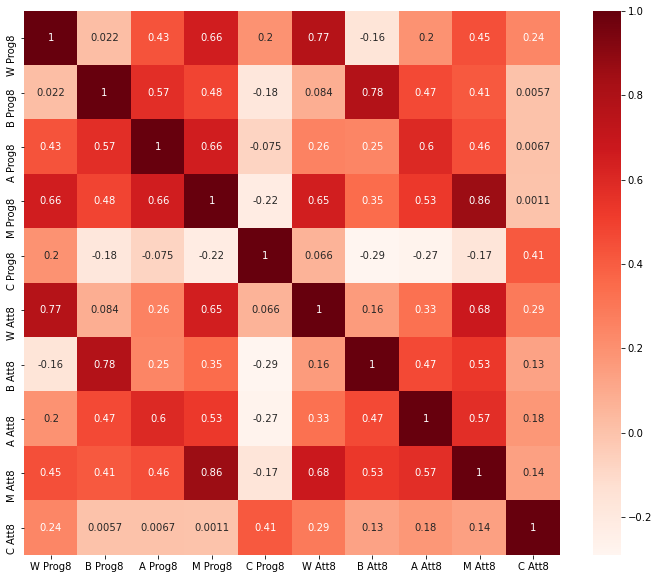

In [34]:
#Using Pearson Correlation heatmap for correlation identification and feature selection
plt.figure(figsize=(12,10))
cor = new_full_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
#Correlation with output variable
cor_target = abs(cor["W Att8"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

W Prog8    0.769188
M Prog8    0.647603
W Att8     1.000000
M Att8     0.679788
Name: W Att8, dtype: float64

In [36]:
#Correlation with output variable
cor_target = abs(cor["B Att8"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

B Prog8    0.776091
B Att8     1.000000
M Att8     0.533864
Name: B Att8, dtype: float64

In [37]:
#Correlation with output variable
cor_target = abs(cor["A Att8"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

A Prog8    0.599283
M Prog8    0.530175
A Att8     1.000000
M Att8     0.574550
Name: A Att8, dtype: float64

In [38]:
#Correlation with output variable
cor_target = abs(cor["M Att8"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

M Prog8    0.860364
W Att8     0.679788
B Att8     0.533864
A Att8     0.574550
M Att8     1.000000
Name: M Att8, dtype: float64

In [39]:
#Correlation with output variable
cor_target = abs(cor["C Att8"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

C Att8    1.0
Name: C Att8, dtype: float64

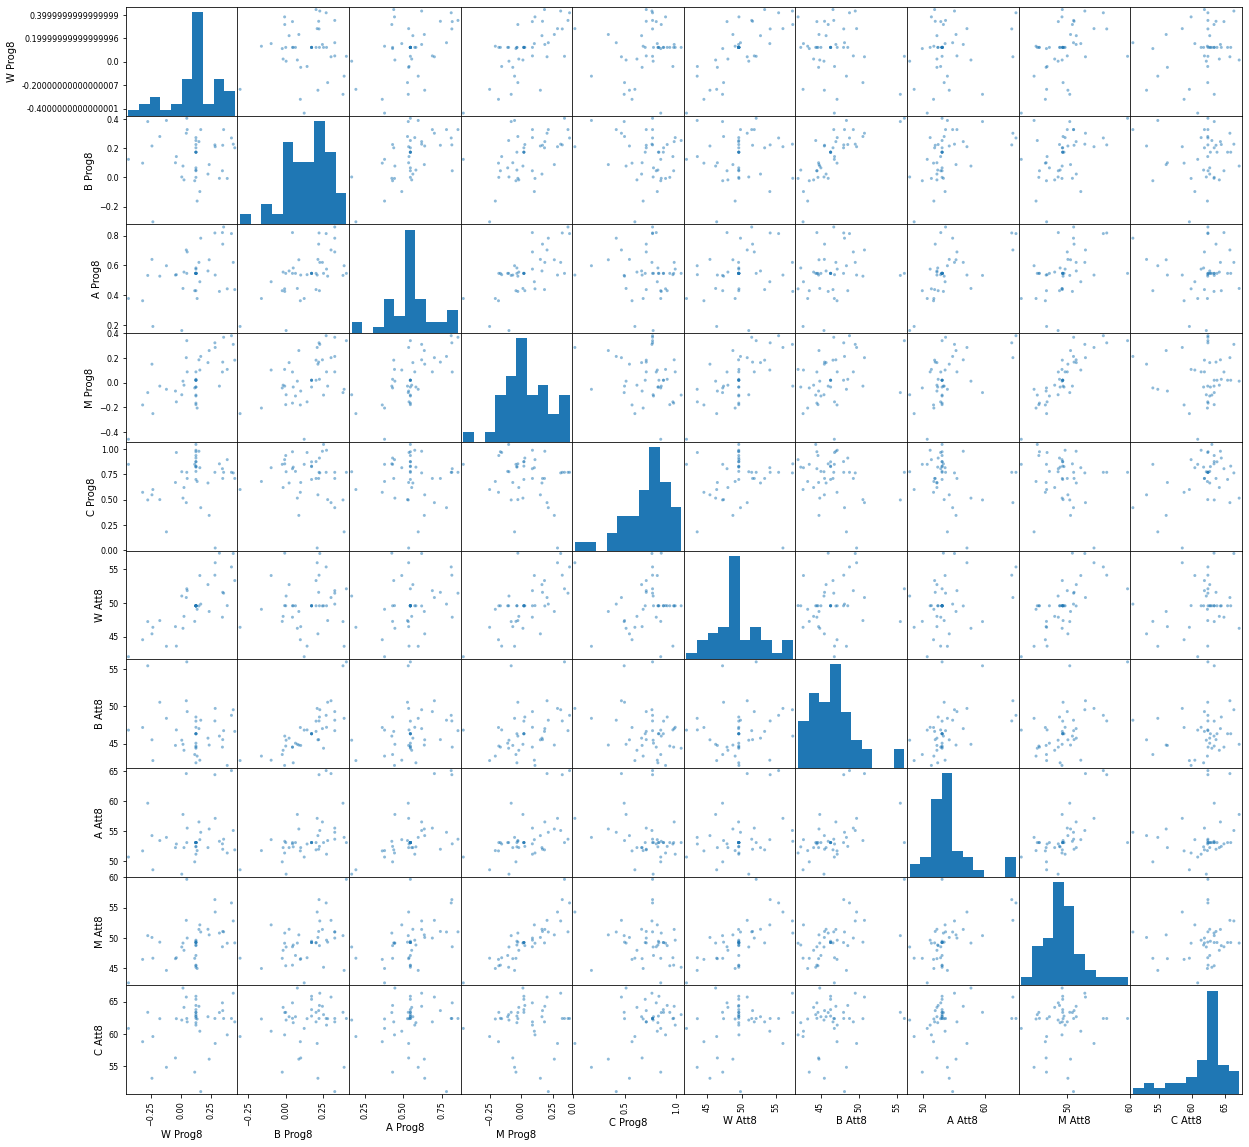

In [40]:
#Scatter Matrix for Data Exploration Purposes
scatter_matrix(new_full_df, figsize=(20,20))
plt.xticks(rotation=90);
plt.yticks(rotation=0);
pyplot.show()

In [41]:
#White Multiple Linear Regression Model
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

fxw = new_full_df[['W Prog8', 'M Prog8']]
fyw = new_full_df[['W Att8']]

Xw = fxw
yw = fyw
 
X_train, X_test, y_train, y_test = train_test_split(Xw, yw, test_size = 0.2, random_state=100)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2 = r2_score(y_test, y_pred)

print('RMSE: \n', test_set_rmse)
print('R2: \n', test_set_r2)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
print ('Predicted Attainment8 Score: \n', regr.predict(X_test))

# with statsmodels
Xw = sm.add_constant(Xw) # adding a constant
 
model = sm.OLS(yw, Xw).fit()
predictions = model.predict(Xw) 
 
print_model = model.summary()
print(print_model)

RMSE: 
 2.0185795612479325
R2: 
 0.4169192809673864
Intercept: 
 [48.28332931]
Coefficients: 
 [[10.83101151  3.40029468]]
Predicted Attainment8 Score: 
 [[48.46804701]
 [47.53933637]
 [52.41260756]
 [49.35730558]
 [49.4911179 ]
 [49.67813411]
 [48.00595563]
 [50.31066629]
 [49.9448767 ]]
                            OLS Regression Results                            
Dep. Variable:                 W Att8   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     34.57
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.60e-09
Time:                        23:19:18   Log-Likelihood:                -94.545
No. Observations:                  44   AIC:                             195.1
Df Residuals:                      41   BIC:                             200.4
Df Model:                           2                                         

In [42]:
#Testing Black Linear Regression Model

import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

fxb = new_full_df[['B Prog8']]
fyb = new_full_df[['B Att8']]

Xb = fxb
yb = fyb
 
X_train, X_test, y_train, y_test = train_test_split(Xb, yb, test_size = 0.2, random_state=100)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2 = r2_score(y_test, y_pred)

print('RMSE: \n', test_set_rmse)
print('R2: \n', test_set_r2)


print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
print ('Predicted Attainment8 Score: \n', regr.predict(X_test))

# with statsmodels
Xb = sm.add_constant(Xb) # adding a constant
 
model = sm.OLS(yb, Xb).fit()
predictions = model.predict(Xb) 
 
print_model = model.summary()
print(print_model)

RMSE: 
 2.334113139048039
R2: 
 0.6431113359472609
Intercept: 
 [44.74606405]
Coefficients: 
 [[12.77502373]]
Predicted Attainment8 Score: 
 [[44.52250113]
 [46.02356642]
 [47.58850683]
 [44.44798016]
 [45.38481523]
 [46.94975564]
 [44.77800161]
 [43.50049923]
 [49.91994866]]
                            OLS Regression Results                            
Dep. Variable:                 B Att8   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     63.61
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           6.05e-10
Time:                        23:19:18   Log-Likelihood:                -88.954
No. Observations:                  44   AIC:                             181.9
Df Residuals:                      42   BIC:                             185.5
Df Model:                           1                                         
Covariance T

In [43]:
#Asian Multiple Linear Regression Test
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

fxa = new_full_df[['A Prog8', 'M Prog8']]
fya = new_full_df[['A Att8']]

Xa = fxa
ya = fya
 
X_train, X_test, y_train, y_test = train_test_split(Xa, ya, test_size = 0.2, random_state=100)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2 = r2_score(y_test, y_pred)

print('RMSE: \n', test_set_rmse)
print('R2: \n', test_set_r2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
print ('Predicted Attainment8 Score: \n', regr.predict(X_test))

# with statsmodels
Xa = sm.add_constant(Xa) # adding a constant
 
model = sm.OLS(ya, Xa).fit()
predictions = model.predict(Xa) 
 
print_model = model.summary()
print(print_model)

RMSE: 
 2.961706534090485
R2: 
 0.5301911944540938
Intercept: 
 [50.08134858]
Coefficients: 
 [[6.73827809 5.48653072]]
Predicted Attainment8 Score: 
 [[53.7113623 ]
 [53.31598653]
 [57.35929707]
 [52.7456306 ]
 [53.81436699]
 [53.8718636 ]
 [50.64138202]
 [53.94547424]
 [55.62755343]]
                            OLS Regression Results                            
Dep. Variable:                 A Att8   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     13.21
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.73e-05
Time:                        23:19:18   Log-Likelihood:                -107.74
No. Observations:                  44   AIC:                             221.5
Df Residuals:                      41   BIC:                             226.8
Df Model:                           2                                         
Co

In [46]:
#Mixed Linear Regression Model Predictions
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
fxm = new_full_df[['M Prog8']]
fym = new_full_df[['M Att8']]

Xm = fxm
ym = fym
 
X_train, X_test, y_train, y_test = train_test_split(Xm, ym, test_size = 0.2, random_state=100)

    
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2 = r2_score(y_test, pred)

print(test_set_rmse)
print(test_set_r2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
print ('Predicted Attainment8 Score: \n', regr.predict(X_test))

# with statsmodels
Xm = sm.add_constant(Xm) # adding a constant
 
model = sm.OLS(ym, Xm).fit()
predictions = model.predict(Xm) 
 
print_model = model.summary()
print(print_model)

2.6835051758085506
0.6094576563641783
Intercept: 
 [48.62543025]
Coefficients: 
 [[13.24249494]]
Predicted Attainment8 Score: 
 [[48.36058035]
 [47.73156184]
 [52.89613487]
 [48.06262421]
 [48.16194293]
 [48.89028015]
 [47.33428699]
 [49.98278598]
 [53.12787853]]
                            OLS Regression Results                            
Dep. Variable:                 M Att8   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     119.7
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           7.18e-14
Time:                        00:32:42   Log-Likelihood:                -84.301
No. Observations:                  44   AIC:                             172.6
Df Residuals:                      42   BIC:                             176.2
Df Model:                           1                                         
Covariance Type:         

In [47]:
#Chinese Linear Regression Model Predictions
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
fxc = new_full_df[['C Prog8']]
fyc = new_full_df[['C Att8']]

Xc = fxc
yc = fyc
 
X_train, X_test, y_train, y_test = train_test_split(Xc, yc, test_size = 0.2, random_state=100)

    
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))

test_set_r2 = r2_score(y_test, pred)

print(test_set_rmse)
print(test_set_r2)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
print ('Predicted Attainment8 Score: \n', regr.predict(X_test))

# with statsmodels
Xc = sm.add_constant(Xc) # adding a constant
 
model = sm.OLS(yc, Xc).fit()
predictions = model.predict(Xc) 
 
print_model = model.summary()
print(print_model)

3.835507826800202
-11.472753738211756
Intercept: 
 [56.34599476]
Coefficients: 
 [[7.62976366]]
Predicted Attainment8 Score: 
 [[61.07644823]
 [61.45793641]
 [62.22727091]
 [62.83129387]
 [62.62147537]
 [61.68682932]
 [62.27177787]
 [62.57696841]
 [62.22727091]]
                            OLS Regression Results                            
Dep. Variable:                 C Att8   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     8.646
Date:                Wed, 07 Apr 2021   Prob (F-statistic):            0.00531
Time:                        00:33:04   Log-Likelihood:                -113.35
No. Observations:                  44   AIC:                             230.7
Df Residuals:                      42   BIC:                             234.3
Df Model:                           1                                         
Covariance Type:          